1. model the RV effect of a spot and a plage using the SOAP 2.0 code that I published two years ago (Dumusque et al. 2014), and then 
2. simulate the RV effect induced by a star like the Sun. 
3. We will inject a planetary signal in the RVs obtained from our solar simulation and see how stellar activity can complicate the detection of small-mass planets. 
4. Finally, we will use a Gaussian Process regression, an interesting approach to model short-term stellar activity signal, and thus extract planetary signals despite stellar signa

1. Joe Spectrograph studies the star Gliese 33 = HD 4628. He has heard that an exoplanet has been discovered around this star, due to radial velocities which follow this ephemeris: 

\begin{equation}
RV(t) = \frac{K}{P} \cos(2\pi(t-T)) + v_{sys}
\end{equation}

# a. What is the value of vsys for this star?


According to Nidever et al. (2002), the K2.5V star HD 4628 has (barycentric) RV=-10230 m/s
as observed on $t$ = 9262-2440000 (JD).

Thus, $v_{sys}$ can be derived as:

In [1]:
import numpy as np

#vsys=v_star+v_planet
T    = 2457083.15992   #Julian Date
P    = 5.2616          #period in days
K    = 69              #Amplitude: m/s
RV   = -10230          #star: m/s
t    = 9262-2440000    #JD

#systemic velocity of the star
vsys= RV - (K * np.cos(2*np.pi*(t-T)/P)) 
print("vsys= {} m/s".format(vsys))

#2440000: May 23, 1968 at 12:00
#2457083.15992: Mar 1, 2015 at 15:50:17

vsys= -10298.93016201734 m/s


Refrences:
[1] Simbad result: 10140 m/s;http://simbad.u-strasbg.fr/simbad/sim-basic?Ident=HD+4628&submit=SIMBAD+search
[2] Nidever et al. ApJ SS, 141:503–522, 2002
http://iopscience.iop.org/article/10.1086/340570/pdf

Primary Name, JD(-2440000), $\Delta$T (days), RV (m/s)
HD 4628, 9262, 3747, 10230

The barycentric radial velocities reported here are found
in a manner similar to that used to find the relative radial
velocities for the planet search. An observed spectrum is fitted
with a synthetic spectrum that is composed of the individual
stellar and iodine spectra. In detail, the synthetic
spectrum is the product of the deconvolved stellar ‘‘ template
’’ spectrum (with the spectrometer instrumental profile
removed) with a high-resolution spectrum of molecular
iodine. The product of these two is convolved with the
instrumental profile of the spectrometer (at the time of the
observation), to produce the final synthetic spectrum, as
described in Butler et al. (2000).

standard Doppler analysis to obtain relative velocities, see
Marcy & Butler (1992), Butler et al. (1996), and Valenti et
al. (1995).

# b. What is the mass of this star?

Can't use this conservation of momentum: M_star*vsys=M_planet*v_planet since mass of planet is not yet known.
Can't use 
K = 203.*(P**(-1./3.))*((M_p/M_Jup)/(((M_star/M_sun)+9.548E-4*(M_p/M_Jup))**(2./3.)))
because this is for K of the planet, not the star.

In [2]:
RV-vsys #RV of 10230 m/s seems too large for K=68 m/s.

68.930162017339171

In [3]:
v_planet = RV- vsys
print(v_planet)

68.9301620173


In [4]:
M_star = ?

SyntaxError: invalid syntax (<ipython-input-4-3af93393ad8c>, line 1)

# c. Make a graph showing the radial velocity predicted by this formula over three consecutive cycles

Populating the interactive namespace from numpy and matplotlib


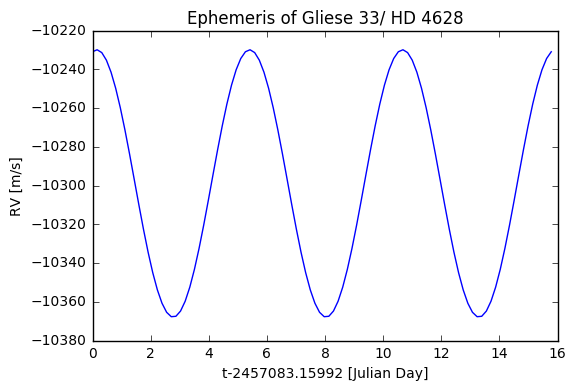

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%pylab inline

T    = 2457083.15992   #Julian Date
P    = 5.2616          #period in days
K    = 69              #m/s
vsys #= 0               #as computed above

t = np.linspace(0,3*P,100) #3 cycles in days
RV = []
for i in t:
    RV_i= K * np.cos(2*np.pi*(i-T)/P) + vsys
    RV.append(RV_i)
    
plt.plot(t,RV,'b-');
plt.xlabel('t-2457083.15992 [Julian Day]');
plt.ylabel('RV [m/s]');
plt.title('Ephemeris of Gliese 33/ HD 4628');

Joe uses his telescope, in Rochester, NY, to measure the spectrum of this star on the following nights: **Oct 1, 2, 7, 9, 12, all in 2015**. On each night, he measures the spectrum three times: at **10 PM, midnight, and 2 AM**, each time with an exposure time of **10 minutes**. He calibrates his spectrum against a neon-helium lamp inside the dome each time.

# Bonus! Make a graph showing the radial velocities Joe will measure from his spectra, relative to the lamp in the dome.

2457083.15992: Mar 1, 2015 at 15:50:17; should I add t=(date in JD-T)

In [2]:
# from DateTime import Timezones
# zones = set(Timezones())

# import pytz
# [x for x in pytz.all_timezones if x not in zones]

['CET', 'EET', 'EST', 'MET', 'MST', 'WET']

New York uses ETZ.

In [11]:
# from DateTime import DateTime
# DateTime('1997/3/9 1:45pm')

DateTime('1997/03/09 13:45:00 GMT+9')

In [ ]:
# a= int[JD+0.5]
# if a >= 2299161:
#     b= int [(a-1867216.25)/36524.25]

# if a < 2299161:
#     c= a+1524

# elif a >= 2299161:
#     c= a + b - int[b/4]+1525

# d= int[(c-122.1)/365.25]
# e= int[365.25/d]
# f= int[(c-e)/30.6001]

# D= c - e - int[30.6001f] + frac[JD + 0.5]
# M= f - 1 - 12[int(f/14)]
# Y= d - 4715 - int[(7 + M)/10]

In [10]:
# import pandas as pd

# #22:00, 02:00, 24:00 #exposure time of 10 minutes
# #UST=ETZ+4
# obs= {'10/1': pd.Series([2457297.25, 2457296.4166667, 2457297.3333333]), 
#       '10/2': pd.Series([2457298.25, 2457297.4166667, 2457298.3333333]),
#       '10/7': pd.Series([2457303.25, 2457302.4166667, 2457303.3333333]),
#       '10/9': pd.Series([2457305.25, 2457304.4166667, 2457305.3333333]),
#       '10/12': pd.Series([2457308.25, 2457307.4166667, 2457308.3333333])}
# t = pd.DataFrame(obs)#, index=['22:00', '02:00', '24:00']) 
# t.columns

In [6]:
T-2457297.41667 #Oct.1 at 10pm

-214.2567500001751

In [7]:
import pandas as pd

time=pd.Series(['10/1 22:00', '10/1 02:00', '10/1 24:00', '10/2 22:00', '10/2 02:00', '10/2 24:00', '10/7 22:00', '10/7 02:00', '10/7 24:00', '10/9 22:00', '10/9 02:00', '10/9 24:00', '10/12 22:00', '10/12 02:00', '10/12 24:00'])
JD=pd.Series([2457297.25, 2457296.4166667, 2457297.3333333, 2457298.25, 2457297.4166667, 2457298.3333333, 2457303.25, 2457302.4166667, 2457303.3333333, 2457305.25, 2457304.4166667, 2457305.3333333, 2457308.25, 2457307.4166667, 2457308.3333333])
obs=pd.DataFrame(time)
obs['JD']=pd.DataFrame(JD)
obs.columns=['time','JD']
obs.head()

,time,JD
0,10/1 22:00,2.457297e+06
1,10/1 02:00,2.457296e+06
2,10/1 24:00,2.457297e+06
3,10/2 22:00,2.457298e+06
4,10/2 02:00,2.457297e+06


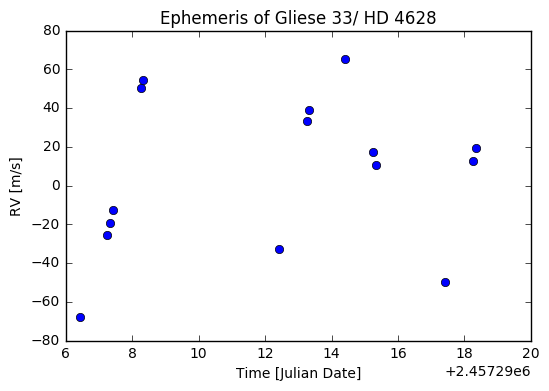

In [8]:
RV = []

for i in obs.JD:
    RV_i= K * np.cos(2*np.pi*(i-T)/P)
    RV.append(RV_i)

plt.plot(obs.JD,RV,'bo');
plt.xlabel('Time [Julian Date]');
plt.ylabel('RV [m/s]');
plt.title('Ephemeris of Gliese 33/ HD 4628');

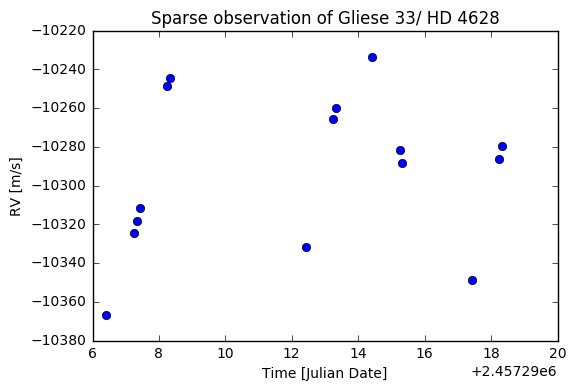

In [7]:
# a=[2457297.25, 2457296.4166667, 2457297.3333333]
# b=[2457298.25, 2457297.4166667, 2457298.3333333]
# c=[2457303.25, 2457302.4166667, 2457303.3333333]
# d=[2457305.25, 2457304.4166667, 2457305.3333333]
# e=[2457308.25, 2457307.4166667, 2457308.3333333]

# obs= append(a,b)
# obs= append(obs,c)
# obs= append(obs,d)
# obs= append(obs,e)

# RV = []

# for i in obs:
#     RV_i= K * np.cos(2*np.pi*(i-T)/P) + vsys
#     RV.append(RV_i)

# plt.plot(obs,RV,'bo');
# plt.xlabel('Time [Julian Date]');
# plt.ylabel('RV [m/s]');
# plt.title('Sparse observation of Gliese 33/ HD 4628');

# d. What is the distance of this planet from its host star?

Using Kepler's 3rd law,

In [ ]:
G= 6.67E-11
a = ((G*M_star*P**2)/(4*np.pi**2))**(1/3)

# e. What is the mass of the planet?

We can compute the $V_{\rm{planet}}$ using

In [ ]:
v_planet = 2*np.pi*a/P

And hence, $M_{\rm{planet}}$ can be computed from

In [ ]:
M_planet=M_star*v_star/v_planet

Assuming $e$=0 and $i=\pi/2$, ...

Joe figures out that he should use standard stars to remove most of the radial velocity variations due to the Earth's rotation and orbital motion. He modifies his procedures and now produces nice tables of radial velocities which show only the change due to the star's own motion.
The following three questions are based on his observations of new objects -- NOT the same as the star in Question 1.

# 2. 
Over a period of several years, Joe measures the radial velocity of one particular star. He sees pretty clear evidence for an exoplanet.

**Hint: the periods in the questions below should all be in the range of 1 - 20 days. If you are using a tool to find the period, it is a good idea to search using a step size <= 0.01 days**

## a. What is the period of variations in this star's radial velocities?

In [ ]:
# url = 'http://spiff.rit.edu/classes/extrasol/homework/hw_4/rv_2.dat'
# req = urllib.request.Request(url)
# with urllib.request.urlopen(req) as response:
#    html = response.read()

# outpath = 'confirmed_planets_{}.csv'.format(time.strftime("%Y%m%d")) #include date of download

# print("retrieving URL: {}".format(url))

# with open(outpath,'wb') as f:
#      f.write(html)
# print("created file: {}".format(outpath))

In [20]:
import pandas as pd

filename='rv_2.dat'
df = pd.read_csv(filename,delim_whitespace=True)# error_bad_lines=False, skiprows=?
df.tail()

,HJD,RV,error
53,2.455315e+06,-7.31,4.17
54,2.455315e+06,-21.09,4.24
55,2.455315e+06,-28.12,4.36
56,2.455315e+06,-20.81,3.86
57,2.455315e+06,-41.51,4.05


In [11]:
len(df)

58

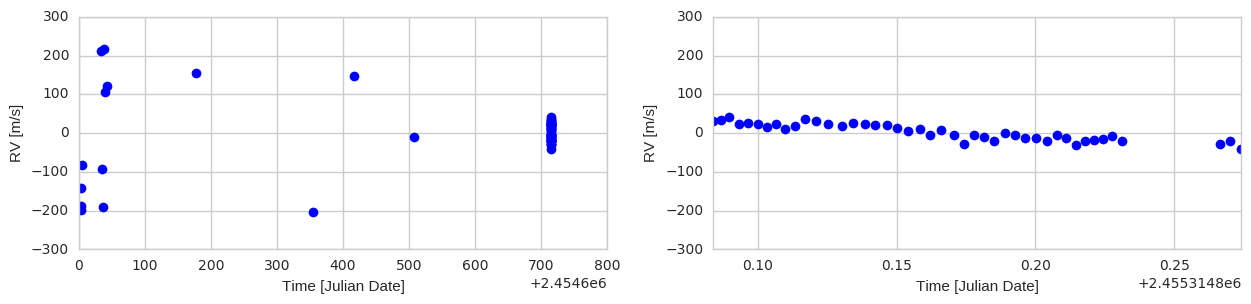

In [35]:
#fig, ax = plt.subplots()
#df.plot(yerr=df.error, ax=ax, kind='scatter')
import seaborn as sb

t=df.HJD 
RV=df.RV
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,2,figsize=(15,3))
    ax[0].plot(t,RV,'bo');
    ax[0].set_xlabel('Time [Julian Date]');
    ax[0].set_ylabel('RV [m/s]');
    ax[1].plot(t,RV,'bo');
    ax[1].set_xlim([t[14],HJD[57]])
    ax[1].set_xlabel('Time [Julian Date]');
    ax[1].set_ylabel('RV [m/s]');

To compute the period, we need to fit a curve first.

In [38]:
import gatspy
from gatspy.periodic import LombScargleFast

t, f = t, df.RV   
f /= np.median(f)                 #normalize

model = LombScargleFast().fit(t, f)
periods, power = model.periodogram_auto(nyquist_factor=100)

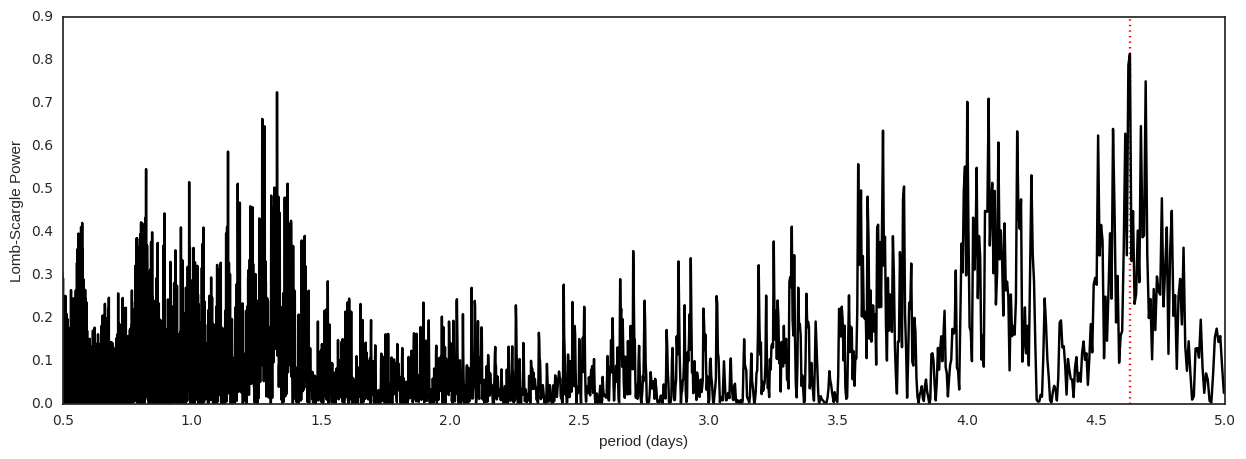

In [40]:
idx1 = periods > 1
idx2 = np.argmax(power[idx1])
peak = periods[idx1][idx2]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 5),
#         , ylim=(0, 0.01),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak, *ax.get_ylim(), linestyles='dotted', colors='r')

Let's remove the datapoints towards the end of observation

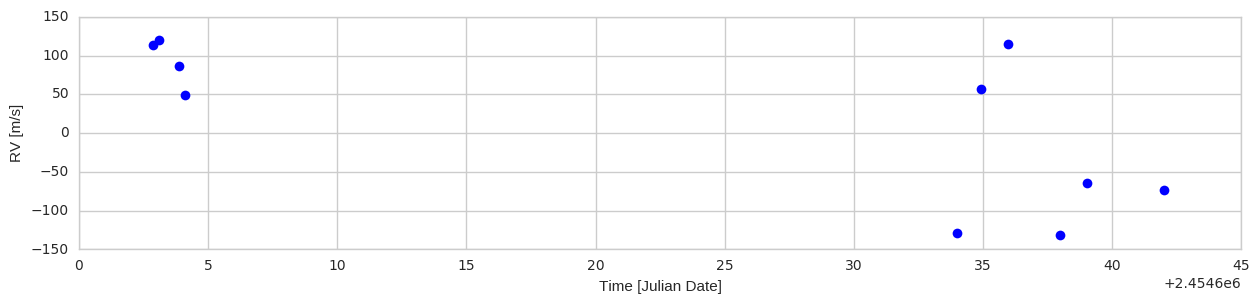

In [80]:
n=10
t1, RV1 = t[:n],RV[:n]
with sb.axes_style('whitegrid'):
    fig, ax = plt.subplots(1,1,figsize=(15,3))
    ax.plot(t1, RV1,'bo');
    ax.set_xlabel('Time [Julian Date]');
    ax.set_ylabel('RV [m/s]');

In [81]:
import gatspy
from gatspy.periodic import LombScargleFast

model = LombScargleFast().fit(t1, RV1)
periods, power = model.periodogram_auto(nyquist_factor=100)

/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


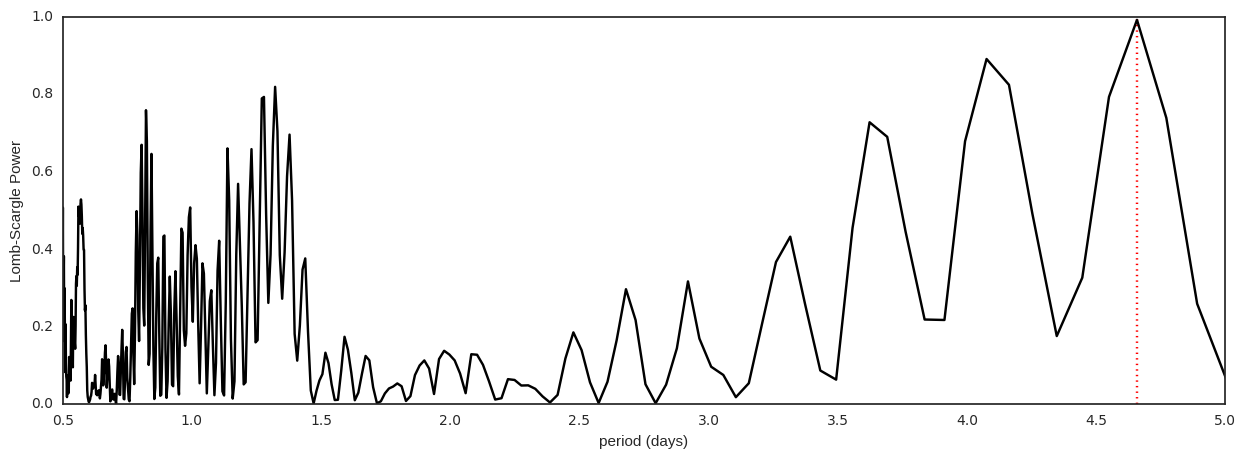

In [83]:
idx1 = periods > 1
idx2 = np.argmax(power[idx1])
peak = periods[idx1][idx2]

with sb.axes_style('white'):
    fig, ax = plt.subplots(1,1,figsize=(15,5))
    ax.plot(periods, power, 'k-')
    ax.set(xlim=(0.5, 5),
       xlabel='period (days)',
       ylabel='Lomb-Scargle Power')
    ax.vlines(peak, *ax.get_ylim(), linestyles='dotted', colors='r')

In [84]:
print("Period is {0:.3} days".format(peak))

Period is 4.66 days


In [85]:
import scipy.optimize as opt
#opt.minimize?

K = max(RV1)
def simple_sin(theta, x):
    K, P, phi = theta
    return K*np.sin(2*np.pi*(x-phi)/P)

def objective(theta, xi, yi):
    model = simple_sin(theta, xi)
    return np.sum((model - yi)**2) #res**2

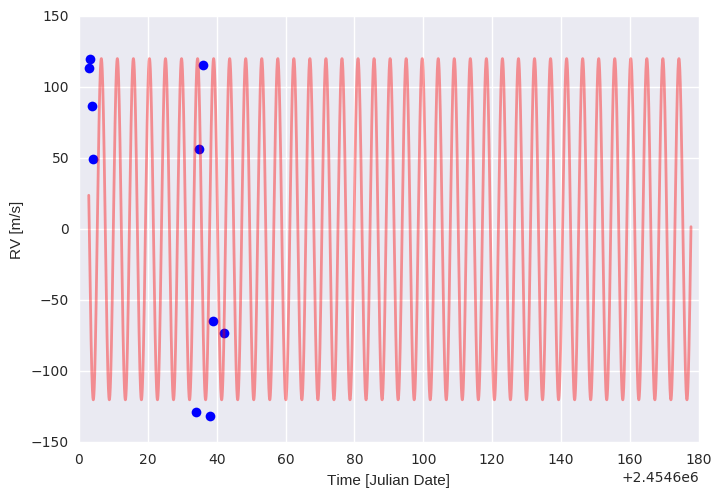

In [86]:
P=peak
init_guess = [K,P,0] #V,Pinv,vsys

x = np.arange(t[0],t[n],0.01)
plt.plot(t1,RV1,'bo');
plt.plot(x, simple_sin(init_guess, x),'r-', lw=2, alpha=0.4)
plt.xlabel('Time [Julian Date]');
plt.ylabel('RV [m/s]');

Fit seems a little off in phase.

In [87]:
optimize = opt.minimize(objective, init_guess, args=(t1,RV1), method='nelder-mead')
optimize

 final_simplex: (array([[  1.13398611e+02,   5.08998247e+00,   4.57868855e-05],
       [  1.13398611e+02,   5.08998247e+00,   4.57868851e-05],
       [  1.13398611e+02,   5.08998247e+00,   4.57868852e-05],
       [  1.13398611e+02,   5.08998247e+00,   4.57868863e-05]]), array([ 89366.15832457,  89366.15832802,  89366.15836402,  89366.15838491]))
           fun: 89366.158324570162
       message: 'Optimization terminated successfully.'
          nfev: 186
           nit: 78
        status: 0
       success: True
             x: array([  1.13398611e+02,   5.08998247e+00,   4.57868855e-05])

In [88]:
for i in optimize.x: #x is the result of opt.minimize
    print('Success={}'.format(optimize.success))
    print("parameter optimum: {}".format(i))

Success=True
parameter optimum: 113.39861084065063
Success=True
parameter optimum: 5.089982470784545
Success=True
parameter optimum: 4.578688554204742e-05


Re-plot using optimized values.

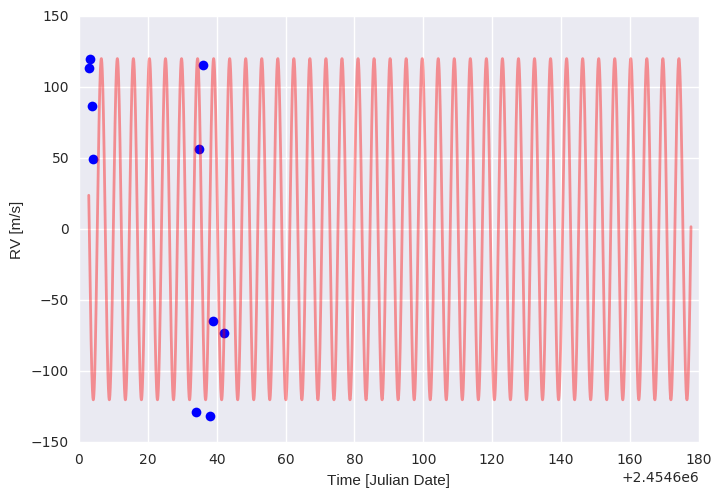

In [89]:
new_guess = []
for i in optimize:
    new_guess.append(optimize[i])

x = np.arange(t[0],t[n],0.01)
plt.plot(t1,RV1,'bo');
plt.plot(x, simple_sin(init_guess, x),'r-', lw=2, alpha=0.4)
plt.xlabel('Time [Julian Date]');
plt.ylabel('RV [m/s]');

In [91]:
phi=new_guess[2] #optimize.x[2]
y_noisy=K * np.sin(2*np.pi*(x-phi)/P)

TypeError: ufunc 'subtract' did not contain a loop with signature matching types dtype('<U37') dtype('<U37') dtype('<U37')

In [50]:
#create a function identical to simple_sine
#mapping/copying of simple_sine to h
h = lambda x,V,P,vsys: K * np.cos(2*np.pi*(x-T)/P) + vsys

p_opt, p_cov = opt.curve_fit(h, HJD, RV, p0=new_guess)
var = np.diag(p_cov)
std = np.sqrt(np.diag(p_cov)) #a.k.a. sigma

for i,j in zip(p_opt, std):
    print ("parameter optimum: {} +/- {}".format(i, j))

#above is similar to
#for i in range(len(p_opt)):
#    print("parameter optimum: {} +/- {}".format(p_opt[i], p_std))

parameter optimum: 150.0 +/- inf
parameter optimum: 39.679994436012706 +/- inf
parameter optimum: 55.69338606839423 +/- inf


/home/dl/miniconda2/envs/transit/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


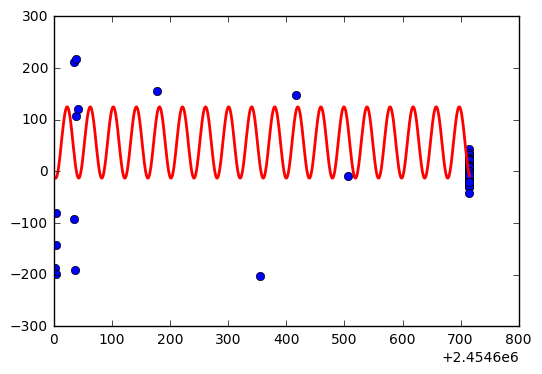

In [69]:
plt.plot(HJD, RV, 'o')
plt.plot(x, h(x,*p_opt), 'r-', lw=2); # *mu; asterisk in variable is required for lambda func 

## b. Assuming that this is a Sun-like star, what is the orbital radius and mass of the planet?

In [ ]:
G= 6.67E-11
a = ((G*M_star*P**2)/(4*np.pi**2))**(1/3)

#M_star*v_star=M_planet*v_planet

## c. Bonus! This is a real exoplanet. Which one?

# 3. 
Joe finds another star with RV variations. These are less obvious. 

## a. What is the period of variations in this star's radial velocities?

In [53]:
import pandas as pd

filename='HW2/rv_3.dat'
df2 = pd.read_csv(filename,delim_whitespace=True)# error_bad_lines=False, skiprows=?
df2.head()

,JD,RV,error
0,2.454434e+06,-1.50827,0.00450
1,2.454435e+06,-1.59145,0.00420
2,2.454436e+06,-1.69089,0.00454
3,2.454440e+06,-1.37548,0.00698
4,2.454441e+06,-1.39927,0.00411


## b. Assuming that this is a Sun-like star, what is the orbital radius and mass of the planet?

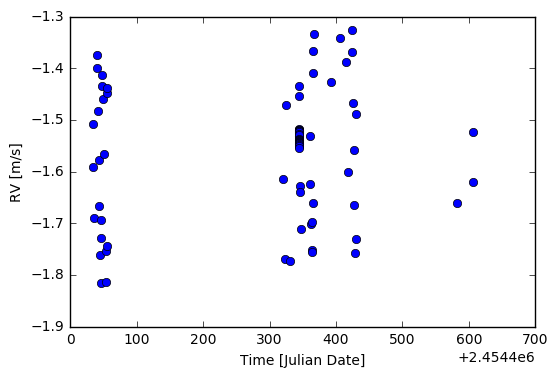

In [55]:
#fig, ax = plt.subplots()
#df.plot(yerr=df.error, ax=ax, kind='scatter')
HJD2=df2.JD 
RV2=df2.RV
plt.plot(HJD2,RV2,'bo');
plt.xlabel('Time [Julian Date]');
plt.ylabel('RV [m/s]');

## c. Bonus! This is a real exoplanet. Which one?

# 4. 
Bonus! Joe thinks that maybe, just maybe, there might a signal in the measurements of another star. He's not sure.
What do you think? 

In [58]:
import pandas as pd

filename='HW2/rv_4.dat'
df3 = pd.read_csv(filename,delim_whitespace=True)# error_bad_lines=False, skiprows=?
df3.head()

,HD,RV,error
0,2.452987e+06,26.4097,0.0024
1,2.453337e+06,26.4133,0.0018
2,2.453368e+06,26.4080,0.0010
3,2.453372e+06,26.4146,0.0012
4,2.453373e+06,26.4150,0.0011


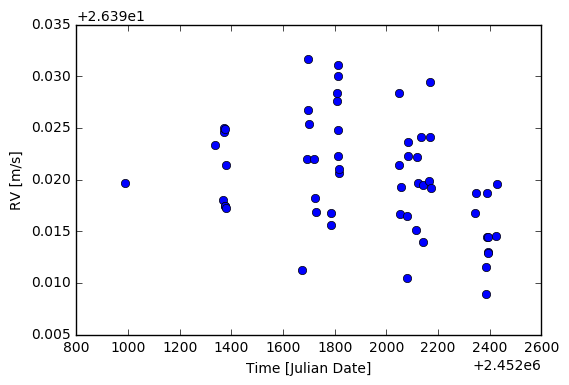

In [60]:
#fig, ax = plt.subplots()
#df.plot(yerr=df.error, ax=ax, kind='scatter')
HJD3=df3.HD 
RV3=df3.RV
plt.plot(HJD3,RV3,'bo');
plt.xlabel('Time [Julian Date]');
plt.ylabel('RV [m/s]');